# Image Classification using CNN on DomestiQ-1000 Dataset

## Overview
This project implements an image classification model using Convolutional Neural Networks (CNNs) in TensorFlow/Keras. The dataset used is `DomestiQ-1000`, which consists of images categorized into 20 different classes. The model is trained to classify these images based on the given labels.

## Data Preprocessing
1. **Dataset Preparation**: The dataset metadata is loaded from `metadata.csv`, containing filenames and their corresponding categories.
2. **Image Augmentation & Normalization**: The images are preprocessed using `ImageDataGenerator` with rescaling (`1./255`) and split into training (80%) and validation (20%) sets.
3. **Training and Validation Set**:
   - **Training Set**: 796 images
   - **Validation Set**: 198 images

## Model Architecture
The CNN model consists of the following layers:
- **Conv2D (32 filters, 3×3 kernel, ReLU activation)**
- **MaxPooling2D (2×2 pool size)**
- **Conv2D (64 filters, 3×3 kernel, ReLU activation)**
- **MaxPooling2D (2×2 pool size)**
- **Conv2D (128 filters, 3×3 kernel, ReLU activation)**
- **MaxPooling2D (2×2 pool size)**
- **Flatten layer**
- **Dense (128 neurons, ReLU activation)**
- **Output layer (Softmax activation for multi-class classification)**

## Training and Results
- The model was trained for **15 epochs** using the **Adam optimizer** and **categorical crossentropy** as the loss function.
- The training accuracy increased to **99.24%**, indicating the model learned patterns from the training data.
- The validation accuracy remained at **0%**, while validation loss continued increasing, suggesting **overfitting**.

## Performance Analysis
The model's accuracy and loss trends are visualized:
1. **Training vs Validation Accuracy**:
   - Training accuracy increased significantly over epochs.
   - Validation accuracy remained stagnant at 0%, indicating poor generalization.
2. **Training vs Validation Loss**:
   - Training loss reduced progressively.
   - Validation loss increased significantly, reinforcing overfitting concerns.

## Conclusion
The model achieves high accuracy on training data but performs poorly on validation data, indicating severe overfitting. However, this is likely due to the **small dataset size**. To improve generalization, techniques such as data augmentation, dropout regularization, and increasing the dataset size should be considered. Implementing early stopping can also help prevent excessive training that leads to overfitting.



In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [2]:
metadata = pd.read_csv('metadata.csv')

In [3]:
base_dir = 'DomestiQ-1000'

In [4]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [5]:
metadata['Filename'] = metadata.apply(lambda row: os.path.join(base_dir, row['Category'], row['Filename']), axis=1)

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2
)

In [7]:
train_generator = datagen.flow_from_dataframe(
    dataframe=metadata,
    x_col='Filename',
    y_col='Category',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 796 validated image filenames belonging to 20 classes.


c:\Users\PRAKHAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 6 invalid image filename(s) in x_col="Filename". These filename(s) will be ignored.
  warnings.warn(


In [8]:
val_generator = datagen.flow_from_dataframe(
    dataframe=metadata,
    x_col='Filename',
    y_col='Category',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 198 validated image filenames belonging to 20 classes.


c:\Users\PRAKHAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 6 invalid image filename(s) in x_col="Filename". These filename(s) will be ignored.
  warnings.warn(


In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(metadata['Category'].unique()), activation='softmax')
])

c:\Users\PRAKHAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)

c:\Users\PRAKHAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\PRAKHAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 631ms/step - accuracy: 0.0789 - loss: 3.2855 - val_accuracy: 0.0000e+00 - val_loss: 5.2374
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 606ms/step - accuracy: 0.1595 - loss: 2.6387 - val_accuracy: 0.0000e+00 - val_loss: 8.2515
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 607ms/step - accuracy: 0.3589 - loss: 2.1653 - val_accuracy: 0.0000e+00 - val_loss: 11.3721
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 606ms/step - accuracy: 0.4997 - loss: 1.5745 - val_accuracy: 0.0000e+00 - val_loss: 9.6906
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 581ms/step - accuracy: 0.6373 - loss: 1.2460 - val_accuracy: 0.0000e+00 - val_loss: 12.7883
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 586ms/step - accuracy: 0.7973 - loss: 0.7350 - val_accuracy: 0.0000e+00 - val_loss: 16.5671
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 581ms/step - accuracy: 0.8625 - loss: 0.5047 - val_accuracy: 0.0000e+00 - val_loss: 19.4643
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 585ms/step - accuracy: 

Text(0.5, 1.0, 'Accuracy')

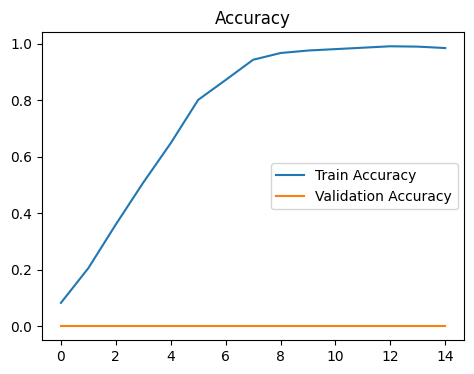

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

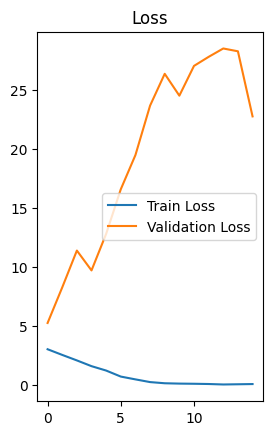

In [13]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()